<a href="https://colab.research.google.com/github/drbasselALKHATIB/ClusteringExample/blob/master/clust.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# نسخ الملفات
!git clone https://github.com/drbasselALKHATIB/ClusteringExample

!cp /content/ClusteringExample/shopping-data.csv /content


fatal: destination path 'ClusteringExample' already exists and is not an empty directory.


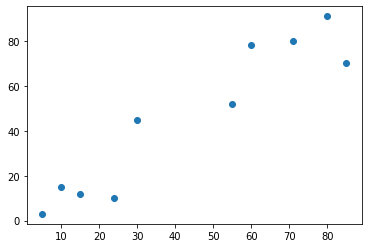

In [8]:
# المكتبة الرقمية
import numpy as np
# مكتبة الرسم
import matplotlib.pyplot as plt

# إنشاء البيانات
X = np.array([[5,3],
     [10,15],
     [15,12],
     [24,10],
     [30,45],
     [85,70],
     [71,80],
     [60,78],
     [55,52],
     [80,91],])
# الرسم
plt.scatter(X[:,0],X[:,1])
plt.show()

In [9]:
# KMeans
from sklearn.cluster import KMeans
# إنشاء غرض من الصف
# تحديد عدد العناقيد المطلوب
kmeans = KMeans(n_clusters=2)
# الملائمة مع البيانات
kmeans.fit(X)
# طباعة المراكز
print(kmeans.cluster_centers_)
# طباعة تسميات العناقيد
print(kmeans.labels_)

[[16.8 17. ]
 [70.2 74.2]]
[0 0 0 0 0 1 1 1 1 1]


In [10]:
# التنبؤ 
print(kmeans.predict([[10,10]]))

[0]


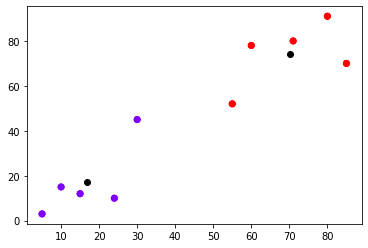

In [11]:
# الرسم مع المراكز
plt.scatter(X[:,0],X[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')

In [12]:
# مكتبة إطار البيانات
import pandas as pd
# تحميل البيانات
customer_data = pd.read_csv('shopping-data.csv')
# إظهار ترويسة البيانات
customer_data.head()

,CustomerID,Annual Income (k$),Spending Score (1-100)
0,1,15,39
1,2,15,81
2,3,16,6
3,4,16,77
4,5,17,40


In [13]:
# حذف رقم الزبون
data = customer_data.iloc[:, 1:3].values
# إنشاء النموذج المتعلم
kmeans = KMeans(n_clusters=5)
# الملائمة مع البيانات
kmeans.fit(data)
# طباعة المراكز
print(kmeans.cluster_centers_)
# طباعة التسميات
print(kmeans.labels_)

[[55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [26.30434783 20.91304348]
 [25.72727273 79.36363636]
 [88.2        17.11428571]]
[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 4 1 0 1 4 1 4 1 0 1 4 1 4 1 4 1 4 1 0 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1]


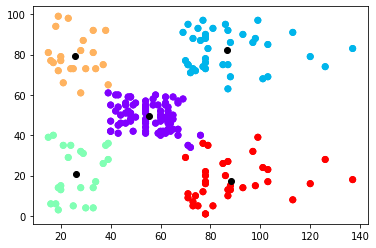

In [14]:
# الرسم
plt.scatter(data[:,0],data[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(data[:,0], data[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')
plt.show()

In [15]:
from sklearn.metrics import silhouette_score
cluster_labels = kmeans.fit_predict(data)
# حساب المعامل
silhouette_avg = silhouette_score(data, cluster_labels)
print(silhouette_avg)

0.553931997444648


In [16]:
# مجموعة القيم الممكنة
range_n_clusters = [2, 3, 4, 5, 6, 7]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(data)
    # حساب المعامل
    silhouette_avg = silhouette_score(data, cluster_labels)
    print(
        "For n =",
        n_clusters,
        "silhouette_score is :",
        silhouette_avg,
    )

For n = 2 silhouette_score is : 0.2968969162503008
For n = 3 silhouette_score is : 0.46761358158775435
For n = 4 silhouette_score is : 0.4931963109249047
For n = 5 silhouette_score is : 0.553931997444648
For n = 6 silhouette_score is : 0.5379675585622219
For n = 7 silhouette_score is : 0.5288104473798049


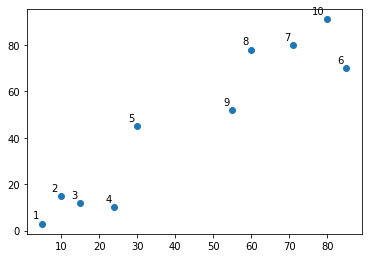

In [17]:
# التسميات : 2,1, ..., 10
labels = range(1, 11)
plt.subplots_adjust(bottom=0.1)
plt.scatter(X[:,0],X[:,1])
# تسمية النقاط
for label, x, y in zip(labels, X[:, 0], X[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom')
plt.show()

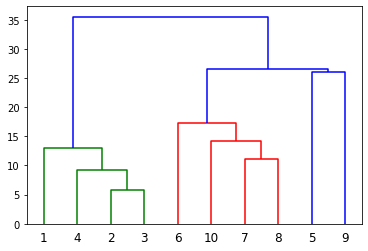

In [18]:
# المكتبات اللازمة
from scipy.cluster.hierarchy import dendrogram, linkage
# اختيار الربط البسيط
linked = linkage(X, 'single')
# التسميات: 1,2, .. ,10
labelList = range(1, 11)
# dendrogram
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

In [19]:
from sklearn.cluster import AgglomerativeClustering
# العنقدة التكتلية
cluster = AgglomerativeClustering(n_clusters=2)
# الملائمة مع البيانات
cluster.fit_predict(X)

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

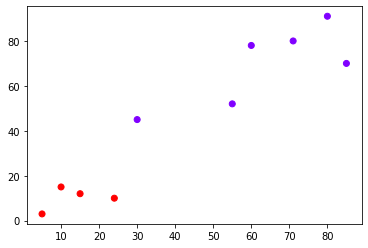

In [20]:
# الرسم
plt.scatter(X[:,0],X[:,1], c=cluster.labels_, cmap='rainbow')
plt.show()

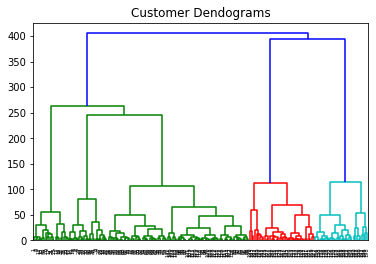

In [21]:
# نوع الربط
linked = linkage(data, 'ward')
# dendrogram
dendrogram(linked,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)
# الرسم
plt.title("Customer Dendograms")
plt.show()

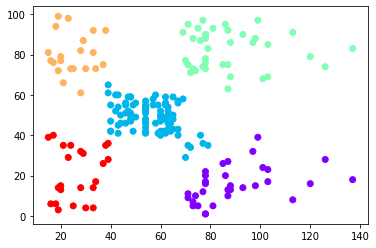

In [22]:
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(data)
# الرسم
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')
plt.show()